# Modeling – Fashion Retail Sales Analysis

Welcome to the modeling phase of the Fashion Retail Sales Analysis project.  
In this notebook, we build and evaluate machine learning models based on the features engineered in the previous step. Our primary modeling objectives are:

1. **Purchase Amount Prediction (Regression)**  
   - Goal: Predict how much a customer is likely to spend on a transaction using historical purchase patterns and customer attributes.
   - Use Case: Revenue forecasting, targeted discounting strategies.

2. **High-Value Transaction Classification (Binary Classification)**  
   - Goal: Identify whether a transaction is considered "high value" based on the top 10% of purchase amounts.
   - Use Case: Flagging premium customer transactions, focused marketing.

We will train baseline models for both tasks using a Random Forest approach and evaluate their performance. These models can later be improved through hyperparameter tuning or replaced with more advanced techniques.

Let's dive in!

In [21]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

sns.set(style="whitegrid")
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load Feature Engineered Data
df = pd.read_parquet("../data/processed/retail_feature_engineered.parquet")
customer_agg = pd.read_parquet("../data/processed/customer_features.parquet")

print("Data loaded successfully.")
print("Main DataFrame shape:", df.shape)
print("Customer Aggregate shape:", customer_agg.shape)

Data loaded successfully.
Main DataFrame shape: (3400, 15)
Customer Aggregate shape: (166, 6)


In [11]:
# 3. Define Targets
# Regression: Predict purchase amount
# Classification: Predict high-value transaction

# --- Regression Setup ---
regression_features = ['month', 'weekday', 'is_q4', 'payment_encoded', 'item_encoded', 'avg_spend', 'purchase_frequency']
X_reg = df[regression_features]
y_reg = df['purchase_amount_(usd)']

# --- Classification Setup ---
classification_features = regression_features.copy()
X_clf = df[classification_features]
y_clf = df['high_value_transaction']

In [13]:
# 4. Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 5. Feature Scaling (for regression)
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [24]:
# 6. Modeling – Regression
print("\nTraining LinearRegression...")
reg_model = LinearRegression()
reg_model.fit(X_train_reg_scaled, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg_scaled)

print("\nRegression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Training LinearRegression...

Regression Results:
RMSE: 392.8490029905585
R² Score: 0.05188600844521907


On average, predictions deviate from the actual purchase amount by about **$393** _(RMSE: ~393)_. Depending on the scale of purchase amounts in the dataset, this could be large and unaacceptable.

R² Score: ~0.052 - The model isn't doing a great job capturing the underlying patterns in the data. Our model is only explaining ~5.2% of the variance in the target variable, which is quite low. 


Training LogisticRegression...

Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       615
        True       0.00      0.00      0.00        65

    accuracy                           0.90       680
   macro avg       0.45      0.50      0.47       680
weighted avg       0.82      0.90      0.86       680



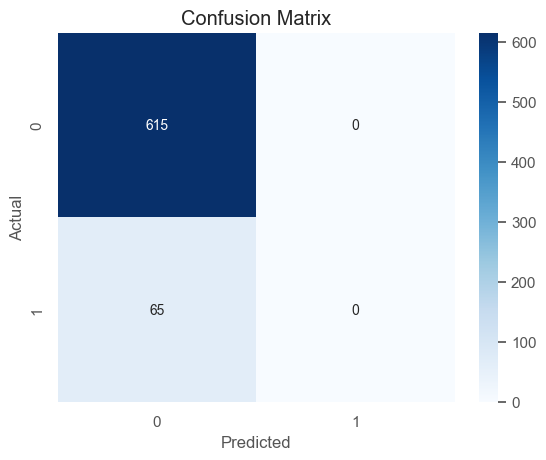

In [25]:
# 7. Modeling – Classification
print("\nTraining LogisticRegression...")
clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)

y_pred_clf = clf_model.predict(X_test_clf)

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()